## Guiding Question: What are customer saying about our movies?

### Our approach to answering this question:
- Analyze text of movie reviews
- Clean the review text data
- Topic Modeling - probablistic output
- Label the probs
- Visualize the results

In [3]:
%cd /Users/jonathansokoll/Documents/lambda_student/DS-Unit-4-Sprint-1-NLP/module4-topic-modeling

/Users/jonathansokoll/Documents/lambda_student/DS-Unit-4-Sprint-1-NLP/module4-topic-modeling


In [4]:
import pandas as pd

df = pd.read_csv('./data/IMDB Dataset.csv')

In [23]:
df.shape

(40436, 2)

In [5]:
# For teaching compute time
df = df.sample(5000)

## Clean Text Data

In [6]:
pd.set_option('display.max_colwidth', -1)
df.head(35)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS12/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


review  \
709    Watch the Original with the same title from 1944! This made for TV movie, is just god-awful! Although it does use (as far as I can tell) almost the same dialog, it just doesn't work! Is it the acting, the poor directing? OK so it's made for TV, but why watch a bad copy, when you can get your hands on the superb original? Especially as you'll be spoiled to the plot and won't enjoy the original as much, as if you've watched it first! <br /><br />There are a few things that are different from the original (it's shorter for once), but all are for the worse! The actors playing the parts here, just don't fit the bill! You just don't believe them and who could top Edward G. Robinsons performance from the original? If you want, only watch it after you've seen the original and even then you'll be very brave, if you watch it through! It's almost sacrilege!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [32]:
# Remove br tags
"""
1. BeautifulSoup
2. Regex
3. Pure Python
"""

'\n1. BeautifulSoup\n'

In [7]:
df['review'] = df['review'].apply(lambda x: x.replace("<br />", ""))

df.head(35)

## Tokenization

- Spacy
- Pure Python
- Gensim
- NLTK

In [9]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [30]:
## Using Lemmas as our tokens

tokens = []

for doc in nlp.pipe(df['review']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != 'PRON')) and (token.is_punct !=True):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [28]:
len(tokens) == df.shape[0]

True

In [33]:
tokens[0]

['watch',
 'Original',
 'title',
 '1944',
 'tv',
 'movie',
 'god',
 'awful',
 'use',
 'far',
 'tell',
 'dialog',
 'work',
 'acting',
 'poor',
 'direct',
 'ok',
 'tv',
 'watch',
 'bad',
 'copy',
 'hand',
 'superb',
 'original',
 'especially',
 'spoiled',
 'plot',
 'will',
 'enjoy',
 'original',
 'watch',
 'thing',
 'different',
 'original',
 'short',
 'bad',
 'actor',
 'play',
 'part',
 'fit',
 'bill',
 'believe',
 'Edward',
 'G.',
 'Robinsons',
 'performance',
 'original',
 'want',
 'watch',
 'see',
 'original',
 'brave',
 'watch',
 'sacrilege']

## Gensim LDA Topic Modeling

In [16]:
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [34]:
id2word = corpora.Dictionary(tokens) #A list of list of tokens 

In [35]:
len(id2word.keys())

40642

In [37]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [38]:
len(id2word.keys())

9439

In [39]:
corpora = [id2word.doc2bow(doc) for doc in tokens]

In [40]:
corpora[5]

[(26, 1),
 (29, 2),
 (49, 1),
 (114, 1),
 (145, 3),
 (179, 1),
 (209, 2),
 (231, 2),
 (236, 1),
 (237, 1),
 (238, 1),
 (239, 1),
 (240, 1),
 (241, 1),
 (242, 1),
 (243, 2),
 (244, 1),
 (245, 1),
 (246, 1),
 (247, 1),
 (248, 1),
 (249, 1),
 (250, 1),
 (251, 1),
 (252, 1),
 (253, 1),
 (254, 1),
 (255, 1),
 (256, 1),
 (257, 1)]

In [45]:
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15, 
                  passes=50)

In [46]:
lda.print_topics()

[(0,
  '0.021*"film" + 0.008*"like" + 0.007*"play" + 0.007*"movie" + 0.006*"good" + 0.005*"Bill" + 0.005*"family" + 0.005*"child" + 0.004*"look" + 0.004*"man"'),
 (1,
  '0.013*"film" + 0.010*"movie" + 0.010*"`" + 0.007*"version" + 0.007*"good" + 0.006*"character" + 0.005*"scene" + 0.005*"original" + 0.004*"performance" + 0.004*"play"'),
 (2,
  '0.013*"like" + 0.007*"look" + 0.007*"kill" + 0.006*"go" + 0.006*"get" + 0.006*"film" + 0.006*"guy" + 0.006*"bad" + 0.006*"girl" + 0.006*"movie"'),
 (3,
  '0.022*"movie" + 0.009*"good" + 0.009*"time" + 0.008*"like" + 0.007*"bad" + 0.007*"watch" + 0.006*"series" + 0.006*"great" + 0.006*"action" + 0.006*"film"'),
 (4,
  '0.069*"movie" + 0.016*"think" + 0.014*"film" + 0.014*"see" + 0.014*"like" + 0.013*"good" + 0.013*"watch" + 0.012*"great" + 0.012*"love" + 0.012*"people"'),
 (5,
  '0.014*"film" + 0.007*"story" + 0.007*"life" + 0.007*"movie" + 0.005*"man" + 0.005*"character" + 0.005*"come" + 0.004*"love" + 0.004*"work" + 0.004*"great"'),
 (6,
  '0.0

In [48]:
import re
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]

In [49]:
topics = [' '.join(t[0:5]) for t in words]

In [50]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
film like play movie good

------ Topic 1 ------
film movie ` version good

------ Topic 2 ------
like look kill go get

------ Topic 3 ------
movie good time like bad

------ Topic 4 ------
movie think film see like

------ Topic 5 ------
film story life movie man

------ Topic 6 ------
good play role love great

------ Topic 7 ------
film character story man life

------ Topic 8 ------
 story woman film man

------ Topic 9 ------
movie bad like film good

------ Topic 10 ------
film story New episode Dracula

------ Topic 11 ------
like character movie good film

------ Topic 12 ------
film man play character story

------ Topic 13 ------
film time scene good character

------ Topic 14 ------
war film soldier War world



## Interpret LDA Results

1. Topic Term Distribution (how good is our LDA model?) / what are the topics
2. Document Topic Distribution
    - What are the documents about?
    - What are the most common themes(topics)?
    - What topics are associated with positive and negative sentiment?

In [53]:
# Part 1: Topic Distance Visualization
"""
Tells us if the topics are distinct, and what terms are most import important to the topic distribution.
"""

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [55]:
pyLDAvis.gensim.prepare(lda,corpora,id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.163514  0.066412  1       1        18.684673
2      0.029790  0.088020  2       1        10.856565
13     0.014306 -0.020847  3       1        10.237432
4      0.104714 -0.019434  4       1        8.914758 
7     -0.070909 -0.029980  5       1        8.593592 
3      0.070677  0.032466  6       1        8.252614 
6      0.071933 -0.127437  7       1        7.303037 
12    -0.053698 -0.036064  8       1        6.866995 
11     0.087262  0.052419  9       1        5.364450 
14    -0.134035  0.052755  10      1        4.196459 
1     -0.059213 -0.135159  11      1        2.572492 
5     -0.028915 -0.042280  12      1        2.506507 
0     -0.007892 -0.020955  13      1        2.240222 
8     -0.136965  0.094316  14      1        1.881954 
10    -0.050567  0.045768  15      1        1.528254 , topic_info=       Term          Freq         Total Category  logprob  loglift
21   movie   10311.000000  10311.000000  Default  30.0000  30.0000
109  film    9639.000000   9639.000000   Default  29.0000  29.0000
7    bad     2617.000000   2617.000000   Default  28.0000  28.0000
227  story   2367.000000   2367.000000   Default  27.0000  27.0000
26   play    1676.000000   1676.000000   Default  26.0000  26.0000
..    ...            ...           ...       ...      ...      ...
114  like    23.086243     4447.278809   Topic15 -5.7443  -1.0798 
71   people  20.668947     1776.339844   Topic15 -5.8549  -0.2726 
21   movie   22.793514     10311.761719  Topic15 -5.7570  -1.9335 
34   thing   20.183872     1640.105225   Topic15 -5.8786  -0.2166 
110  follow  18.456495     406.790070    Topic15 -5.9681   1.0882 

[1239 rows x 6 columns], token_table=      Topic      Freq Term
term                      
2909  2      0.025868     
2909  3      0.175903     
2909  5      0.263854     
2909  8      0.010347     
2909  10     0.015521     
...  ..           ... ..  
3829  8      0.029260    
3829  10     0.034136    
3829  13     0.034136    
3829  14     0.014630    
3829  15     0.019506    

[4699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 14, 5, 8, 4, 7, 13, 12, 15, 2, 6, 1, 9, 11])

In [58]:
# Part 2: What are the documents about? 
# Eqv. to a `.predict` statement in sklearn
# Scoring the topic distribution of a single document

lda[corpora[0]]

[(0, 0.1095671), (3, 0.15882052), (6, 0.16516562), (9, 0.5526032)]

In [69]:
distro = [lda[d] for d in corpora]

In [62]:
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [70]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics

In [71]:
doc_topics.head()

,film like play movie good,film movie ` version good,like look kill go get,movie good time like bad,movie think film see like,film story life movie man,good play role love great,film character story man life,story woman film man,movie bad like film good,film story New episode Dracula,like character movie good film,film man play character story,film time scene good character,war film soldier War world
0,0.109559,0.0,0.0,0.158755,0.000000,0.00000,0.165211,0.000000,0.0,0.552631,0.0,0.000000,0.0,0.000000,0.00000
1,0.000000,0.0,0.0,0.000000,0.989267,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000
2,0.000000,0.0,0.0,0.000000,0.134812,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.844037,0.0,0.000000,0.00000
3,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.777827,0.000000,0.0,0.207720,0.0,0.000000,0.0,0.000000,0.00000
4,0.000000,0.0,0.0,0.000000,0.310204,0.09473,0.000000,0.323527,0.0,0.000000,0.0,0.000000,0.0,0.186874,0.07881


In [73]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

In [74]:
doc_topics['primary_topic'].value_counts()

movie bad like film good          1332
movie think film see like         578 
film time scene good character    515 
like look kill go get             449 
movie good time like bad          394 
good play role love great         351 
film character story man life     305 
film man play character story     283 
like character movie good film    248 
war film soldier War world        125 
film story life movie man         111 
film like play movie good         98  
film movie ` version good         83  
film story New episode Dracula    69  
 story woman film man             59  
Name: primary_topic, dtype: int64

# Selecting the Number of Topics (Learn)
<a id="#p4"></a>

In [75]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [76]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

In [77]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [78]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-1.163710
1,0,5,-1.157799
2,0,7,-1.170228
3,0,9,-1.185494
4,0,11,-1.206256


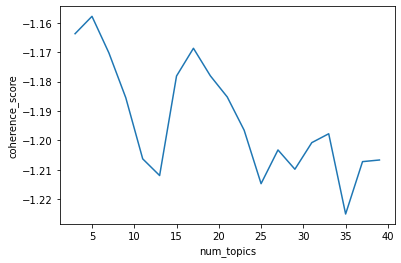

In [79]:
import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)